In [9]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
import seaborn as sns
import pandas as pd
import time
from IPython.display import clear_output
import os
import random
import time
from matplotlib import rcParams
rcParams['figure.figsize'] = 11.7,4
sns.set_theme()

### Datos
Simulación de datos No lineales con 
$\mathbf{x}\in \mathbb{R}^{n}$ y $\mathbf{y}\in \mathbb{R}^{n}$.

$$\mathbf{x}=
\begin{pmatrix}
x_1\\ 
x_2\\ 
x_3\\ 
\vdots \\ 
x_n\\ 
\end{pmatrix} \mathbf{y}=
\begin{pmatrix}
y_1\\ 
y_2\\ 
y_3\\ 
\vdots \\ 
y_n\\ 
\end{pmatrix}$$

Modelo matemático $y_i=e^{x_i^2+3x_i+2}$

In [10]:
#Simulación con ruido gausiano
n = 200
x = np.linspace (0,1, n)                                            # Genera datos que contienen ruido
a1, b1, c1 = 1,3,2                                                  # Este es el parámetro real de la función y (x) que debe ajustarse
y = [np.exp(a1*i**2+b1*i+c1)+random.gauss(0,4) for i in x]
df=pd.DataFrame({'x': x, 'y': y})

### Gráfica de los datos observados

Text(5.334999999999994, 0.5, 'salidas')

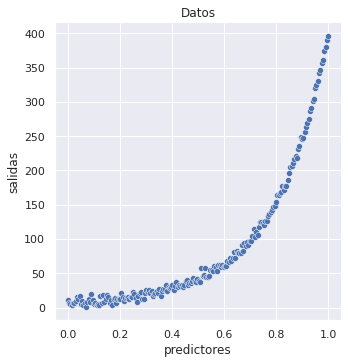

In [11]:
sns.relplot(x='x', y='y', data=df)
plt.title('Datos')
plt.xlabel('predictores')
plt.ylabel('salidas')

### Levenberg-Marquardt

In [12]:
y0 = np.matrix(y) # Convertir a forma matricial

In [13]:
def Func(abc, iput): # La función que se va a ajustar, abc es una matriz que contiene tres parámetros [[a], [b], [c]]
  a = abc[0,0]
  b = abc[1,0]
  c = abc[2,0]
  return np.exp(a*iput**2+b*iput+c)

In [14]:
def Deriv(abc, iput, n): # Encuentra la derivada parcial de la función
  x1 = abc.copy()
  x2 = abc.copy()
  delta=0.000001 #Influye en la tasa de aprendizaje
  x1[n,0] -= delta 
  x2[n,0] += delta
  p1 = Func(x1,iput)
  p2 = Func(x2,iput)
  d = (p2-p1)*1.0/(2*delta)
  return d

In [15]:
J = np.matrix(np.zeros ((n, 3)))      #Jacobi matrix
fx = np.matrix(np.zeros ((n, 1)))     # f (x) 100 * 1 error
fx_tmp = np.matrix(np.zeros((n,1)))
xk = np.matrix([[0.8], [2.7], [1.5]]) # inicialización de parámetro
lase_mse = 0
step = 0
u,v= 1,2
conve = 100

[[0.89054925]
 [3.15957362]
 [1.94452211]] 0.13326811790466309 7


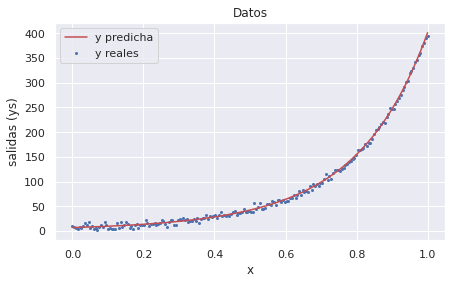

In [16]:
step=0
tic=time.time()
while (conve):
  mse,mse_tmp = 0,0
  step += 1  
  for i in range(n):
    fx[i] = Func(xk, x[i]) - y0[0,i] # Tenga en cuenta que no se puede escribir como y-Func, de lo contrario divergerá
    mse += fx[i,0]**2
    for j in range(3): 
      J[i, j] = Deriv(xk, x[i], j)   # derivada numérica                                                    
  mse /= n # restricción de rango

  H = J.T*J + u*np.eye(3)   # 3*3
  dx = -H.I*J.T*fx # Tenga en cuenta que hay un signo menos, que corresponde al signo de fx = Func-y
  xk_tmp = xk.copy()
  xk_tmp += dx

  for j in range(n):
    fx_tmp[i] =  Func(xk_tmp, x[i]) - y0[0,i]  
    mse_tmp += fx_tmp[i,0]**2
  mse_tmp /= n

  q = (mse - mse_tmp)/((0.5*dx.T*(u*dx - J.T*fx))[0,0])

  if q > 0:
    s = 1.0/3.0
    v = 2
    mse = mse_tmp
    xk = xk_tmp
    temp = 1-pow(2*q-1,3)

    if s > temp:
      u = u*s
    else:
      u = u*temp
  else:
    u = u*v
    v = 2*v
    xk = xk_tmp

  #print ("step = %d,abs(mse-lase_mse) = %.8f" %(step,abs(mse-lase_mse)))  
  if abs(mse-lase_mse)<0.00000001:  #Sensibilidad
    break

  lase_mse = mse # registra la posición del mse anterior
  conve -= 1

toc=time.time()-tic
print(xk, toc, step)

z = [Func (xk, i) for i in x] # Dibujar con los parámetros ajustados

plt.figure(figsize=(7,4))
plt.scatter(x,np.array(y0)[0],s = 4, label="y reales")

plt.title('Datos')
plt.xlabel('x')
plt.ylabel('salidas (ys)')
plt.plot(x,z,'r', label="y predicha")
plt.legend()
plt.show()